In [3]:

import matplotlib.pyplot as plt
import csv

## read and cretae a panda frame
import pandas as pd

previous_path_bad = 'data/history_batch_1_bad.csv'
previous_path_health = 'data/history_batches_1_health.csv'
batch_1 = 'data-bitirme/history_batches_2.csv'
batch_2 = 'data-bitirme/history_batches_2.csv'
## read the csv file
df = pd.read_csv(batch_1)
#df_health = pd.read_csv('data/history_batch_1_bad_attacker.csv')
df_health = pd.read_csv(batch_2)
## 
df.tail()

,Unnamed: 0,timestamp,capacity_used,removed_flow_average_duration,removed_flow_byte_per_packet,removed_average_byte_per_sec,average_flow_duration_on_table,packet_in_rate,removed_flows_count,number_of_errors,flow_table_stats,flow_table_stats_durationsremoved_table_stats,removed_table_stats_durations,is_attack
29,29,1.717440e+09,0.08,20.391892,51.517267,7.157337,127.554630,361,148,166,"[{6: 4}, {'10.0.0.5': 1, '10.0.0.2': 2, '10.0....",NaN,"[{6: 0.07752407543703385, 1: 0.593693514433158...",0
30,30,1.717440e+09,0.08,20.391892,51.517267,7.157337,132.800741,361,148,166,"[{6: 4}, {'10.0.0.5': 1, '10.0.0.2': 2, '10.0....",NaN,"[{6: 0.07752407543703385, 1: 0.593693514433158...",0
31,31,1.717440e+09,0.08,20.391892,51.517267,7.157337,137.583804,361,148,166,"[{6: 4}, {'10.0.0.5': 1, '10.0.0.2': 2, '10.0....",NaN,"[{6: 0.07752407543703385, 1: 0.593693514433158...",0
32,32,1.717440e+09,0.08,20.391892,51.517267,7.157337,147.619831,361,148,166,"[{6: 4}, {'10.0.0.5': 1, '10.0.0.2': 2, '10.0....",NaN,"[{6: 0.07752407543703385, 1: 0.593693514433158...",0
33,33,1.717440e+09,0.08,20.391892,51.517267,7.157337,157.684514,361,148,166,"[{6: 4}, {'10.0.0.5': 1, '10.0.0.2': 2, '10.0....",NaN,"[{6: 0.07752407543703385, 1: 0.593693514433158...",0


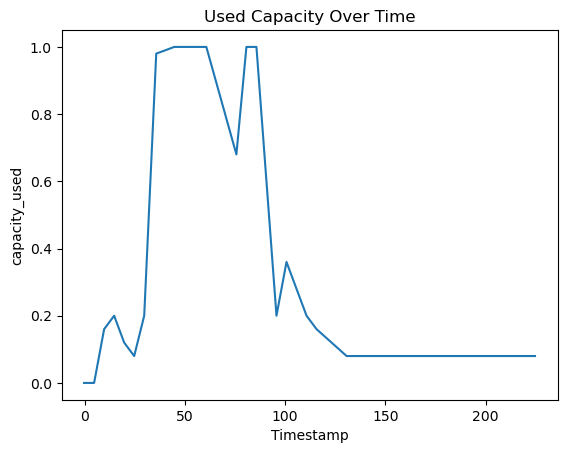

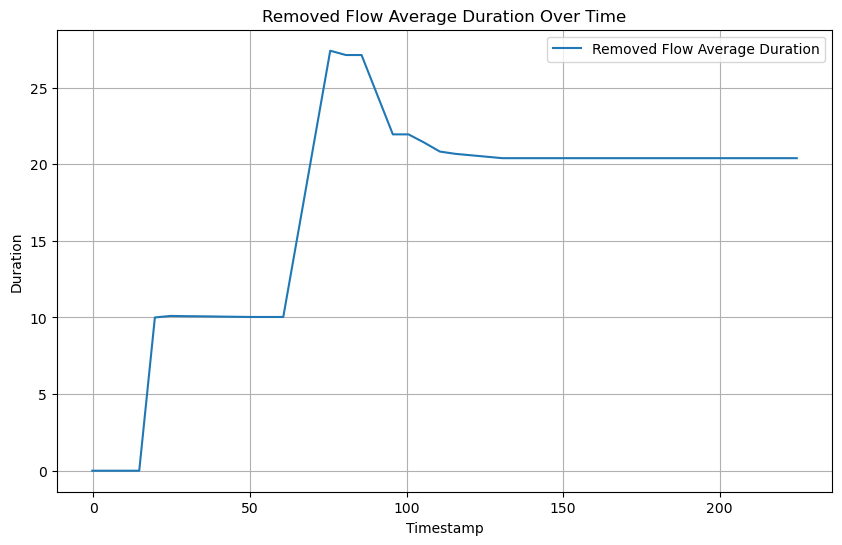

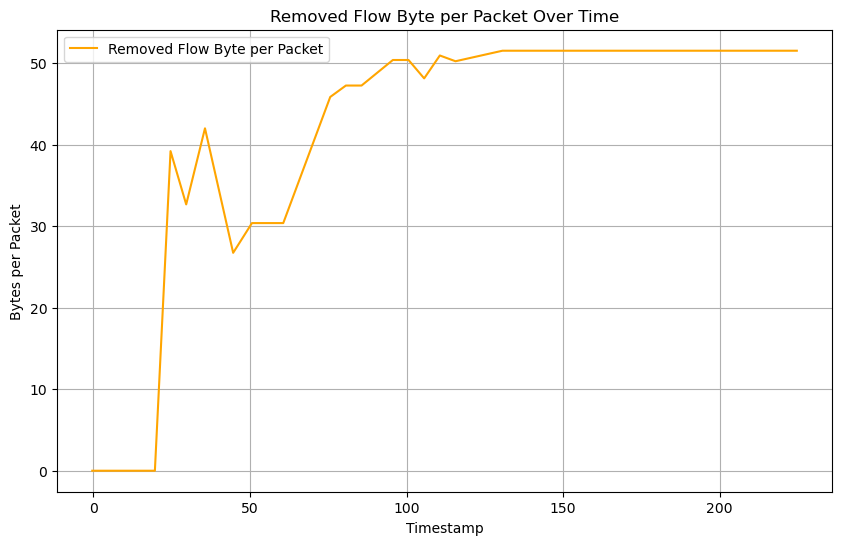

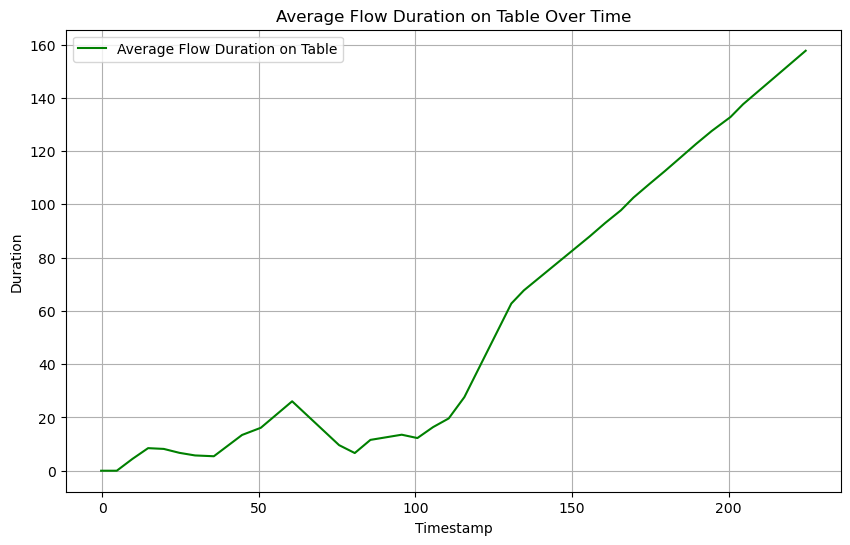

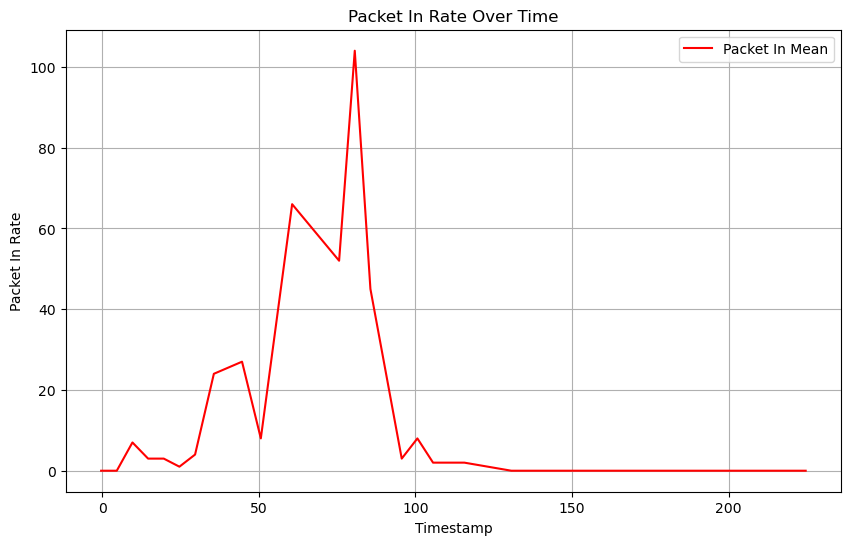

In [4]:
#show the capacity used in Tim
## timestamp is like 1715339594.1680713 delete the digits after the point
df['timestamp'] = df['timestamp'].apply(lambda x: int(x) - df['timestamp'][0]) 
df_health['timestamp'] = df_health['timestamp'].apply(lambda x: int(x) - int(df_health['timestamp'][0]))
plt.plot(df['timestamp'], df['capacity_used'])
plt.xlabel('Timestamp')
plt.ylabel('capacity_used')
plt.title('Used Capacity Over Time')
plt.show()


# Plot 1: removed_flow_average_duration
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['removed_flow_average_duration'], label='Removed Flow Average Duration')
plt.xlabel('Timestamp')
plt.ylabel('Duration')
plt.title('Removed Flow Average Duration Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: removed_flow_byte_per_packet
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['removed_flow_byte_per_packet'], label='Removed Flow Byte per Packet', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Bytes per Packet')
plt.title('Removed Flow Byte per Packet Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: average_flow_duration_on_table
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['average_flow_duration_on_table'], label='Average Flow Duration on Table', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Duration')
plt.title('Average Flow Duration on Table Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: packet_in_mean
# Calculate the difference between consecutive 'packet_in_mean' values directly
df['packet_in_rate'] = df['packet_in_rate'].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['packet_in_rate'], label='Packet In Mean', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Packet In Rate')
plt.title('Packet In Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

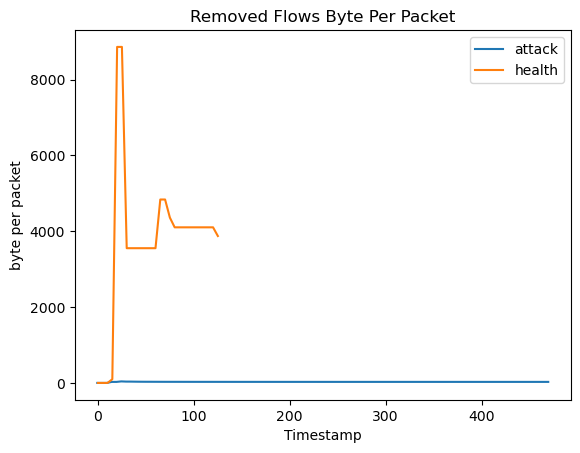

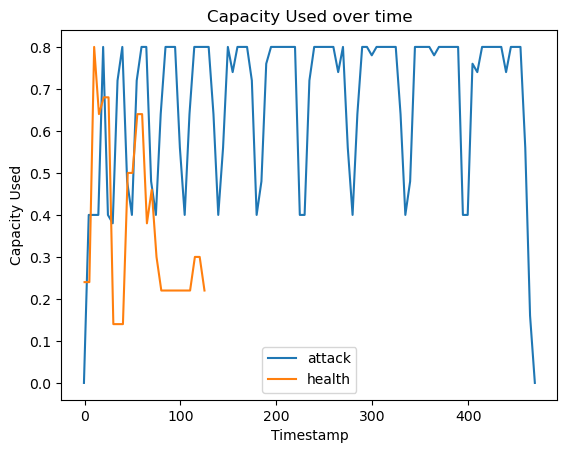

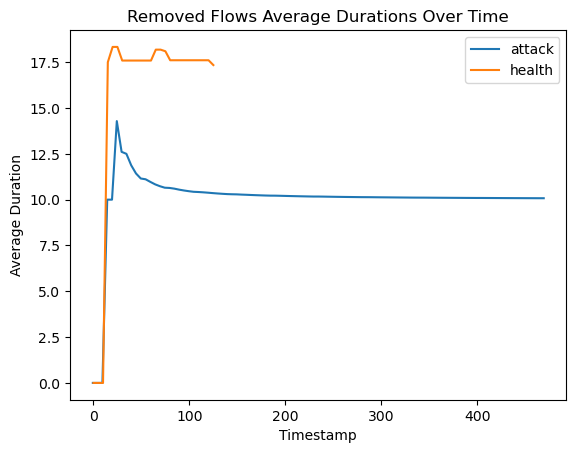

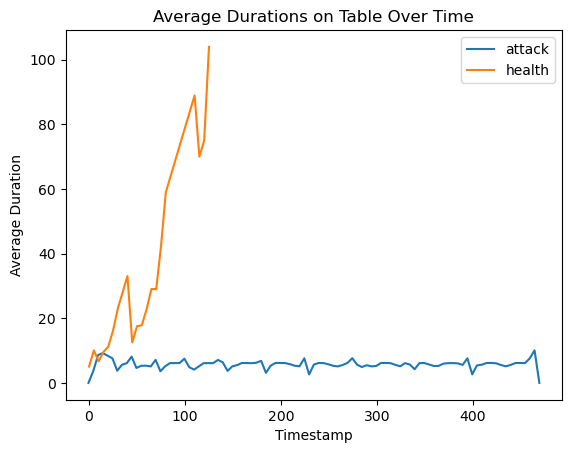

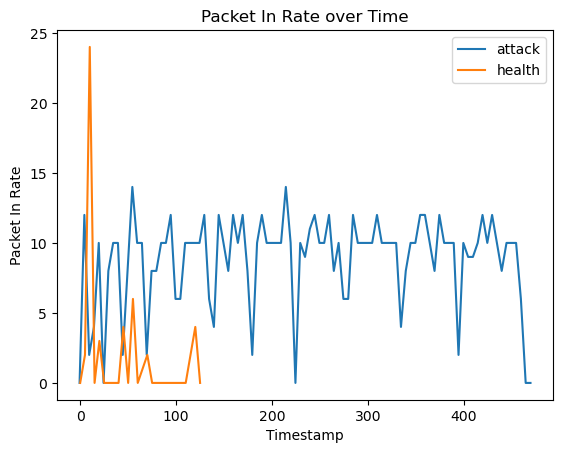

In [63]:
## plot the flow table duraitons in the plot
plt.plot(df['timestamp'], df['removed_flow_byte_per_packet'], label = "attack")
plt.plot(df_health['timestamp'], df_health['removed_flow_byte_per_packet'], label = "health")
plt.xlabel('Timestamp')
plt.ylabel('byte per packet')
plt.title("Removed Flows Byte Per Packet")
plt.legend()
plt.show()

## compare capacity used
plt.plot(df['timestamp'], df['capacity_used'], label = "attack")
plt.plot(df_health['timestamp'], df_health['capacity_used'], label = "health")
plt.xlabel('Timestamp')
plt.ylabel('Capacity Used')
plt.title("Capacity Used over time")
plt.legend()
plt.show()

## compare average duration
plt.plot(df['timestamp'], df['removed_flow_average_duration'], label = "attack")
plt.plot(df_health['timestamp'], df_health['removed_flow_average_duration'], label = "health")
plt.xlabel('Timestamp')
plt.ylabel('Average Duration')
plt.title("Removed Flows Average Durations Over Time")
plt.legend()
plt.show()

#average_flow_duration_on_table
plt.plot(df['timestamp'], df['average_flow_duration_on_table'], label = "attack")
plt.plot(df_health['timestamp'], df_health['average_flow_duration_on_table'], label = "health")
plt.xlabel('Timestamp')
plt.ylabel('Average Duration')
plt.title("Average Durations on Table Over Time")
plt.legend()
plt.show()

#packet_in_rate
# Calculate the difference between consecutive 'packet_in_mean' values directly
df_health['packet_in_rate'] = df_health['packet_in_rate'].diff().fillna(0)
plt.plot(df['timestamp'], df['packet_in_rate'], label = "attack")
plt.plot(df_health['timestamp'], df_health['packet_in_rate'], label = "health")
plt.xlabel('Timestamp')
plt.ylabel('Packet In Rate')
plt.title("Packet In Rate over Time")
plt.legend()
plt.show()

In [64]:
result = df['flow_table_stats']
unique_keys = set()
for data in result:
  data = eval(data)
  for index, item in enumerate(data):
    if (index == 0):
      list = [f'proto_{i}'for i in item.keys()]
    if (index == 1):
      list = [f'ip_src_{i}'for i in item.keys()]
    if (index == 2):
      list = [f'ip_dst_{i}'for i in item.keys()]
    unique_keys.update(list)
df_flow_table_attack = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_flow_table_attack.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1
    
result = df['removed_table_stats']
df_removed_flow_table_attack = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_removed_flow_table_attack.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1

## append this to the previous data frame
dataframe_extended_attack = pd.concat([df, df_flow_table_attack, df_removed_flow_table_attack], axis=1)
dataframe_extended_attack.drop(['flow_table_stats', 'removed_table_stats'], axis=1, inplace=True)
dataframe_extended_attack

,Unnamed: 0,timestamp,capacity_used,removed_flow_average_duration,removed_flow_byte_per_packet,average_flow_duration_on_table,packet_in_rate,number_of_errors,ip_src_10.0.0.2,ip_dst_10.0.0.1,proto_6,ip_dst_10.0.0.2,ip_src_10.0.0.1,ip_src_10.0.0.2,ip_dst_10.0.0.1,proto_6,ip_dst_10.0.0.2,ip_src_10.0.0.1
0,0,-0.634101,0.00,0.000000,0.000000,0.000000,0.0,0,None,None,None,None,None,None,None,None,None,None
1,1,4.365899,0.40,0.000000,0.000000,3.656309,12.0,0,10,10,20,10,10,None,None,None,None,None
2,2,9.365899,0.40,0.000000,0.000000,8.626846,2.0,0,10,10,20,10,10,None,None,None,None,None
3,3,14.365899,0.40,10.000000,27.000000,9.232017,4.0,0,10,10,20,10,10,4,4,8,4,4
4,4,19.365899,0.80,10.000000,27.000000,8.411915,10.0,0,20,20,40,20,20,4,4,8,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,449.365899,0.80,10.081081,27.248649,6.172049,10.0,0,20,20,40,20,20,740,740,1480,740,740
91,91,454.365899,0.80,10.080000,27.245333,6.127601,10.0,0,20,20,40,20,20,750,750,1500,750,750
92,92,459.365899,0.56,10.078947,27.242105,7.601391,6.0,0,14,14,28,14,14,760,760,1520,760,760
93,93,464.365899,0.16,10.077922,27.238961,10.081525,0.0,0,4,4,8,4,4,770,770,1540,770,770


In [65]:
result = df_health['flow_table_stats']
unique_keys = set()
for data in result:
  data = eval(data)
  for index, item in enumerate(data):
    if (index == 0):
      list = [f'proto_{i}'for i in item.keys()]
    if (index == 1):
      list = [f'ip_src_{i}'for i in item.keys()]
    if (index == 2):
      list = [f'ip_dst_{i}'for i in item.keys()]
    unique_keys.update(list)
df_flow_table_health = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_flow_table_health.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1
    
result = df_health['removed_table_stats']
df_removed_flow_table_health = pd.DataFrame(columns = tuple(unique_keys))
count = 0
for item in result:
    item = eval(item)
    row_data = [None] * len(unique_keys)
    for index, proto in enumerate(item):
        for key, value in proto.items():
            if (index == 0):
                row_data[tuple(unique_keys).index(f'proto_{key}')] = value
            if (index == 1):
                row_data[tuple(unique_keys).index(f'ip_src_{key}')] = value
            if (index == 2):
                row_data[tuple(unique_keys).index(f'ip_dst_{key}')] = value
    df_removed_flow_table_health.loc[count] = pd.Series(row_data, index=unique_keys)
    count+=1

## append this to the previous data frame
dataframe_extended_health = pd.concat([df_health, df_flow_table_health, df_removed_flow_table_health], axis=1)
dataframe_extended_health.drop(['flow_table_stats', 'removed_table_stats'], axis=1, inplace=True)
dataframe_extended_health

/var/folders/t2/jz737vh50y1bhc86zv_hs_d40000gn/T/ipykernel_52638/2375065552.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_removed_flow_table_health.loc[count] = pd.Series(row_data, index=unique_keys)


,Unnamed: 0,timestamp,capacity_used,removed_flow_average_duration,removed_flow_byte_per_packet,average_flow_duration_on_table,packet_in_rate,number_of_errors,ip_src_10.0.0.2,ip_dst_10.0.0.1,...,ip_dst_10.0.0.2,ip_src_10.0.0.1,proto_17,ip_src_10.0.0.2,ip_dst_10.0.0.1,proto_6,proto_1,ip_dst_10.0.0.2,ip_src_10.0.0.1,proto_17
0,0,0,0.24,0.000000,0.000000,5.057469,0.0,0,6.0,6.0,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,0.24,0.000000,0.000000,10.063432,2.0,0,6.0,6.0,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10,0.80,0.000000,0.000000,6.694382,24.0,0,34.0,34.0,...,6.0,6.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15,0.64,17.500000,97.700000,9.585682,0.0,0,30.0,30.0,...,2.0,2.0,28.0,4.0,4.0,NaN,8.0,4.0,4.0,NaN
4,4,20,0.68,18.333333,8860.948792,11.183001,3.0,0,30.0,30.0,...,4.0,4.0,30.0,6.0,6.0,4.0,8.0,6.0,6.0,NaN
5,5,25,0.68,18.333333,8860.948792,16.176650,0.0,0,30.0,30.0,...,4.0,4.0,30.0,6.0,6.0,4.0,8.0,6.0,6.0,NaN
6,6,30,0.14,17.589744,3553.081680,23.050691,0.0,0,7.0,7.0,...,NaN,NaN,7.0,29.0,29.0,8.0,8.0,10.0,10.0,23.0
7,7,35,0.14,17.589744,3553.081680,28.040316,0.0,0,7.0,7.0,...,NaN,NaN,7.0,29.0,29.0,8.0,8.0,10.0,10.0,23.0
8,8,40,0.14,17.589744,3553.081680,33.059116,0.0,0,7.0,7.0,...,NaN,NaN,7.0,29.0,29.0,8.0,8.0,10.0,10.0,23.0
9,9,45,0.50,17.589744,3553.081680,12.535585,4.0,0,11.0,11.0,...,14.0,14.0,7.0,29.0,29.0,8.0,8.0,10.0,10.0,23.0


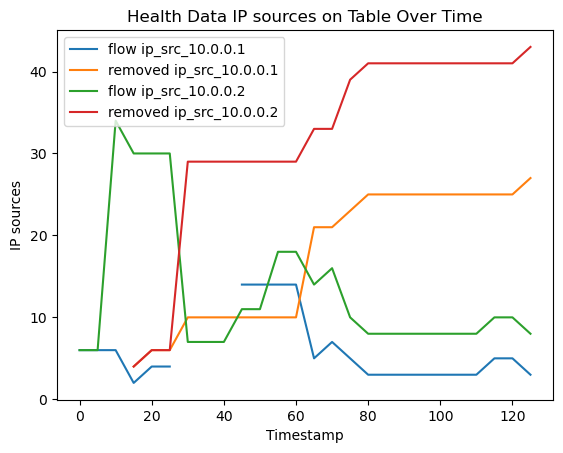

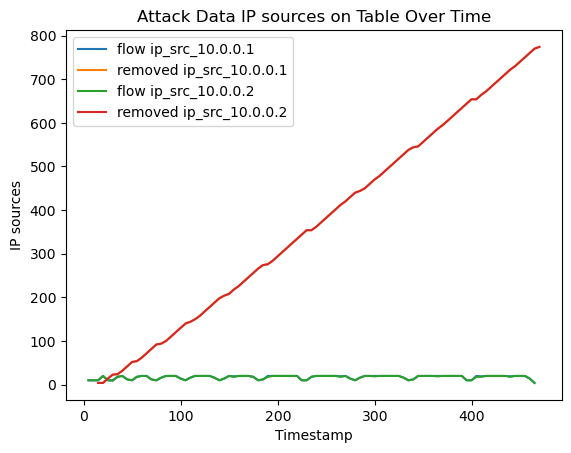

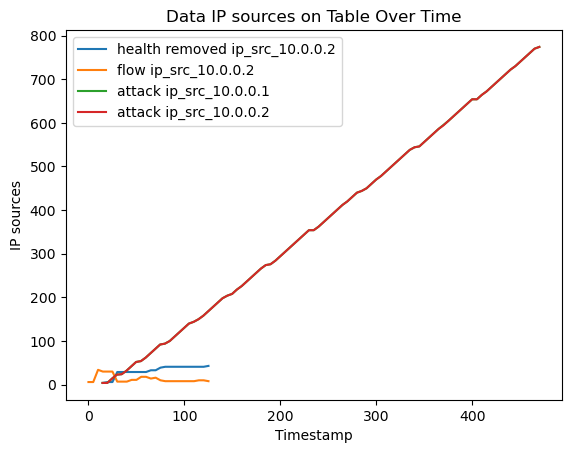

In [70]:
dataframe_extended_attack['timestamp'] = dataframe_extended_attack['timestamp'].apply(lambda x: int(x) - df['timestamp'][0]) 
dataframe_extended_health['timestamp'] = dataframe_extended_health['timestamp'].apply(lambda x: int(x) - int(df_health['timestamp'][0]))


#average_flow_duration_on_table
plt.plot(dataframe_extended_health['timestamp'], df_flow_table_health['ip_src_10.0.0.1'], label = "flow ip_src_10.0.0.1")
plt.plot(dataframe_extended_health['timestamp'], df_removed_flow_table_health['ip_src_10.0.0.1'], label = "removed ip_src_10.0.0.1")
plt.plot(dataframe_extended_health['timestamp'], df_flow_table_health['ip_src_10.0.0.2'], label = "flow ip_src_10.0.0.2")
plt.plot(dataframe_extended_health['timestamp'], df_removed_flow_table_health['ip_src_10.0.0.2'], label = "removed ip_src_10.0.0.2")
plt.xlabel('Timestamp')
plt.ylabel('IP sources')
plt.title("Health Data IP sources on Table Over Time")
plt.legend()
plt.show()

plt.plot(dataframe_extended_attack['timestamp'], df_flow_table_attack['ip_src_10.0.0.1'], label = "flow ip_src_10.0.0.1")
plt.plot(dataframe_extended_attack['timestamp'], df_removed_flow_table_attack['ip_src_10.0.0.1'], label = "removed ip_src_10.0.0.1")
plt.plot(dataframe_extended_attack['timestamp'], df_flow_table_attack['ip_src_10.0.0.2'], label = "flow ip_src_10.0.0.2")
plt.plot(dataframe_extended_attack['timestamp'], df_removed_flow_table_attack['ip_src_10.0.0.2'], label = "removed ip_src_10.0.0.2")
plt.xlabel('Timestamp')
plt.ylabel('IP sources')
plt.title("Attack Data IP sources on Table Over Time")
plt.legend()
plt.show()

plt.plot(dataframe_extended_health['timestamp'], df_removed_flow_table_health['ip_src_10.0.0.2'], label = "health removed ip_src_10.0.0.2")
plt.plot(dataframe_extended_health['timestamp'], df_flow_table_health['ip_src_10.0.0.2'], label = "health flow ip_src_10.0.0.2")
plt.plot(dataframe_extended_attack['timestamp'], df_flow_table_attack['ip_src_10.0.0.2'], label = "attack flow ip_src_10.0.0.2")
plt.plot(dataframe_extended_attack['timestamp'], df_removed_flow_table_attack['ip_src_10.0.0.2'], label = "attack flow ip_src_10.0.0.2")
plt.xlabel('Timestamp')
plt.ylabel('IP sources')
plt.title("Data IP sources on Table Over Time")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import entropy

# Function to flatten lists and nested structures
def flatten(column):
    flattened = []
    for item in column:
        if isinstance(item, type([])):
            flattened.extend(item)
        else:
            flattened.append(item)
    return pd.Series(flattened)

# Function to calculate entropy, ignoring NaN values
def calculate_entropy(column):
    value_counts = column.dropna().value_counts()
    return entropy(value_counts)

# Assuming 'dataframe_extended_attack' is your DataFrame and it has already been loaded
columns = ['ip_dst_10.0.0.1', 'ip_dst_10.0.0.2', 'ip_src_10.0.0.1', 'ip_src_10.0.0.2', 'proto_1', 'proto_17', 'proto_6']
entropy_values = {}

for col in columns:
    if col in dataframe_extended_attack.columns:
        # Flatten the column if needed and calculate entropy
        flattened_column = flatten(dataframe_extended_attack[col])
        entropy_values[col] = calculate_entropy(flattened_column)
    else:
        entropy_values[col] = None
        print(f"Column {col} does not exist in the DataFrame.")

# Display the results
for col, ent in entropy_values.items():
    if ent is not None:
        print(f'Entropy of {col}: {ent}')
    else:
        print(f'Entropy of {col} could not be calculated due to missing column.')


Column proto_1 does not exist in the DataFrame.
Column proto_17 does not exist in the DataFrame.
Entropy of ip_dst_10.0.0.1: 0.0
Entropy of ip_dst_10.0.0.2: 0.0
Entropy of ip_src_10.0.0.1: 0.0
Entropy of ip_src_10.0.0.2: 0.0
Entropy of proto_1 could not be calculated due to missing column.
Entropy of proto_17 could not be calculated due to missing column.
Entropy of proto_6: 0.0
